Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [ ]:
NAME = ""
COLLABORATORS = ""

---

# Интерполяция при помощи полиномов Лагранжа.

In [3]:
import numpy as np

class LagrangeInterpolator:
    """Lagrange interpolating polynomial.
    
    Given a set of pairs ``(x_k, y_k)``, construct 
    a Lagrange polynomial ``f(x)``, such that
    
    .. math::

        f(x_k) = y_k   for k =0, ..., n-1
    
    Parameters
    ----------
    xk : array_like, shape(n,)
        Abscissas
    yk : array_like, shape(n,)
        Ordinates
    
    Attributes
    ----------
    __call__
    
    """
    def __init__(self, xk, yk):
        self.xk = np.asarray(xk, dtype=float)
        self.yk = np.asarray(yk, dtype=float)
        
    def __call__(self, x):
        
        """Evaluate the interpolator at a given point.
        
        Parameters
        ----------
        x : float
        
        Returns
        -------
        the value of the interpolator at ``x``.
        """
        
        def term(xval, xk, k):
            zk = np.delete(xk, k)
            n = xk.shape[0]
            xval_arr = np.repeat(xval, n-1)
            return np.prod((xval_arr - zk)/(xk[k] - zk))
        
        return sum(y*term(x, self.xk, k) for k, y in enumerate(self.yk))


In [4]:
def runge_func(x, a=25):
    return 1.0 / (1.0 + a*x**2)

xx = np.linspace(-2, 2, 21)
yy = runge_func(xx)

lagr = LagrangeInterpolator(xx, yy)

from numpy.testing import assert_allclose

assert_allclose(yy,
                [lagr(xval) for xval in xx],
                atol=1e-14)

Рассмотрим функцию Рунге $1/(1 + 25x^2)$. Интерполируйте данную функцию на интервале $x\in [-2, 2]$, используя полиномы Лагранжа степени $m$, где $m=3, 5, 7, 11$. Используйте равномерную сетку. Постройте результат интерполяции вместе с $f(x)$.

Повторите предыдущее задание используя узлы Чебышева. Сравните качество интерполяции на равномерной сетке и на узлах Чебышева.


Равномерная сетка:


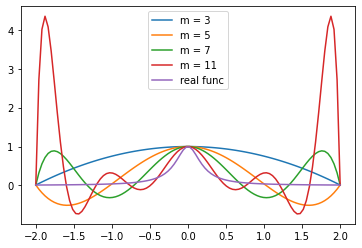

In [23]:
import matplotlib.pyplot as plt

func = lambda x: 1/(1 + 25 * x * x) 
xx = np.linspace(-2, 2, 100)

def interp(laInterpolator):
    ly = np.array([laInterpolator(x) for x in xx])
    line, = plt.plot(xx, ly)
    line.set_label(f"m = {m}")


print("Равномерная сетка:")
for m in (3,5,7,11):
    xk = np.linspace(-2, 2, m)
    yk = func(xk)
    laInterpolator = LagrangeInterpolator(xk, yk)
    interp(laInterpolator)

yy = func(xx)

line, = plt.plot(xx, yy)
line.set_label(f"real func")
plt.legend()

На узлах Чебышева


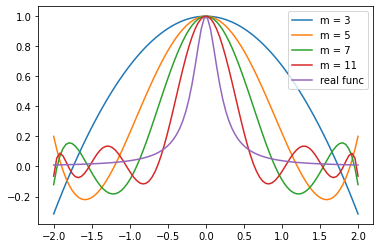

In [22]:
print("На узлах Чебышева")


for m in (3,5,7,11):
    a, b = -2, 2
    xk = np.array([1/2*(a+b) + 1/2*(b-a)*np.cos((2*k-1)*np.pi/(2*m)) for k in range(1, m+1)])
    yk = func(xk)
    laInterpolator = LagrangeInterpolator(xk, yk)
    interp(laInterpolator)

yy = func(xx)

line, = plt.plot(xx, yy)
line.set_label(f"real func")
plt.legend()